# Análise de dados do Spotify

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("Accent")
sns.set_style("darkgrid")

## Base de dados utilizada

https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

In [2]:
df_genres = pd.read_csv("data_by_genres_o.csv")
df_genres.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


## Início da análise - 100 gêneros mais populares

Faremos a análise com base nos dados por gênero, com o intuito de entender o que os gêneros mais populares têm em comum e assim prever próximos hits. Para isso, vamos conferir quais elementos estão mais relacionados com a popularidade de um gênero.

In [3]:
df_genres.corr()["popularity"].sort_values(ascending = False)

popularity          1.000000
loudness            0.344361
energy              0.337795
danceability        0.217992
tempo               0.146717
valence             0.023072
key                 0.008577
mode               -0.031231
speechiness        -0.045217
duration_ms        -0.071019
liveness           -0.094178
instrumentalness   -0.265449
acousticness       -0.458698
Name: popularity, dtype: float64

Com base nos dados acima, faremos uma análise inicial para:

- **volume (loudness):** quão alta são as músicas do gêneor em dB, de -60 à 0
- **energia (energy):** quão energética as músicas do gênero são, de 0 à 1
- **dançabilidade (danceability):** quão adequada para dançar são as músicas do gênero, de 0 à 1

In [4]:
df_pop = df_genres.sort_values(by = "popularity", ascending = False).head(100)
df_pop.reset_index(inplace = True)
df_pop = df_pop[["genres", "popularity", "loudness", "energy", "danceability"]]
df_pop.head(10)

,genres,popularity,loudness,energy,danceability
0,basshall,80.666667,-6.627833,0.630167,0.81800
1,turkish edm,80.000000,-4.923000,0.719000,0.69800
2,south african house,80.000000,-7.719000,0.562333,0.84700
3,trap venezolano,80.000000,-4.246000,0.777000,0.87700
4,alberta hip hop,78.500000,-6.429000,0.685000,0.88500
5,chinese electropop,78.500000,-4.592000,0.787000,0.66000
6,afroswing,77.312500,-7.016687,0.580187,0.71175
7,afro soul,77.000000,-6.381000,0.873000,0.76600
8,russian dance,77.000000,-2.634000,0.945000,0.65300
9,guaracha,77.000000,-3.506000,0.972000,0.74500


### Funções para análise

#### Histograma único

Função utilizada para construir um histograma sobre apenas um dado de um DataFrame.

In [5]:
def plotar_histograma_unico(dataframe, x, titulo, xlabel, ylabel, xlim_min, xlim_max, legend):
    
    plt.figure(figsize = (20, 10))
    sns.histplot(data = dataframe, x = x, kde = True, bins = 25)

    plt.title(titulo, fontsize = 24, loc = "left")
    plt.xlabel(xlabel, fontsize = 18)
    plt.ylabel(ylabel, fontsize = 18)
    plt.xlim(xlim_min, xlim_max)

    plt.axvline(dataframe[x].mean(), color = 'r', label = legend)

    plt.legend(prop = {"size": 15})
    plt.show()

#### Histograma comparação

Função utilizada para construir histogramas de comparação entre dados dos gêneros menos e mais populares.

In [6]:
def plotar_histograma_comparacao(x, titulo, xlabel, ylabel, xlim_min, xlim_max):
    
    df_menos_pop = df_pop[x][50:]
    df_mais_pop = df_pop[x][0:50]
    
    plt.figure(figsize = (20, 10))
    sns.histplot(df_menos_pop, kde = True, bins = 25, label = "50 menos popular")
    sns.histplot(df_mais_pop, kde = True, bins = 25, label = "50 mais popular", color = "b")
    
    plt.title(titulo, fontsize = 24, loc = "left")
    plt.xlabel(xlabel, fontsize = 18)
    plt.ylabel(ylabel, fontsize = 18)       
    plt.xlim(xlim_min, xlim_max)
    
    plt.legend(prop = {"size": 15})
    plt.show()

### Análise do volume

#### Distribuição geral do volume

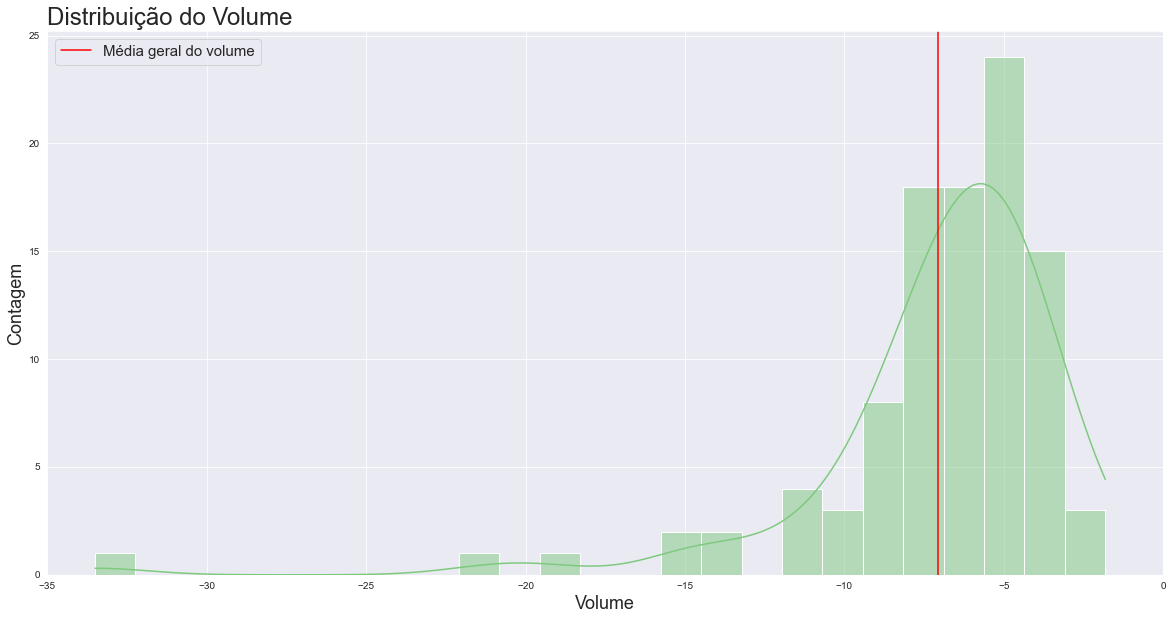

In [7]:
plotar_histograma_unico(df_pop, "loudness", "Distribuição do Volume",
          "Volume", "Contagem", -35, 0, "Média geral do volume")

#### Comparação do volume entre os gêneros menos e mais populares

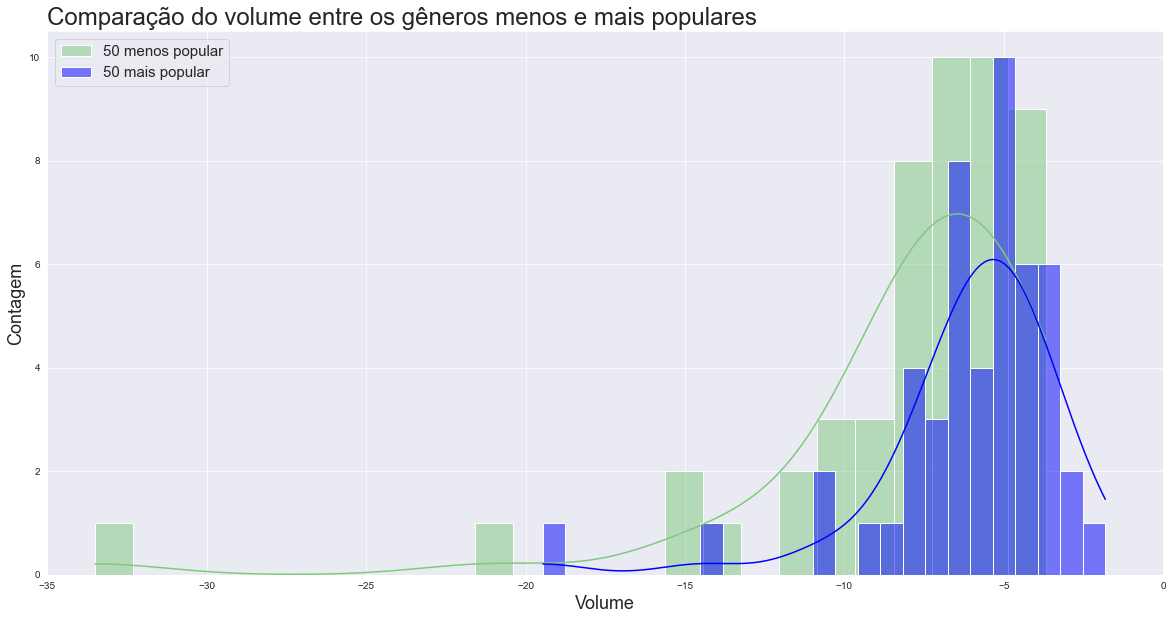

In [8]:
plotar_histograma_comparacao("loudness", "Comparação do volume entre os gêneros menos e mais populares",
                            "Volume", "Contagem", -35, 0) 

### Análise da energia

#### Distribuição geral da energia

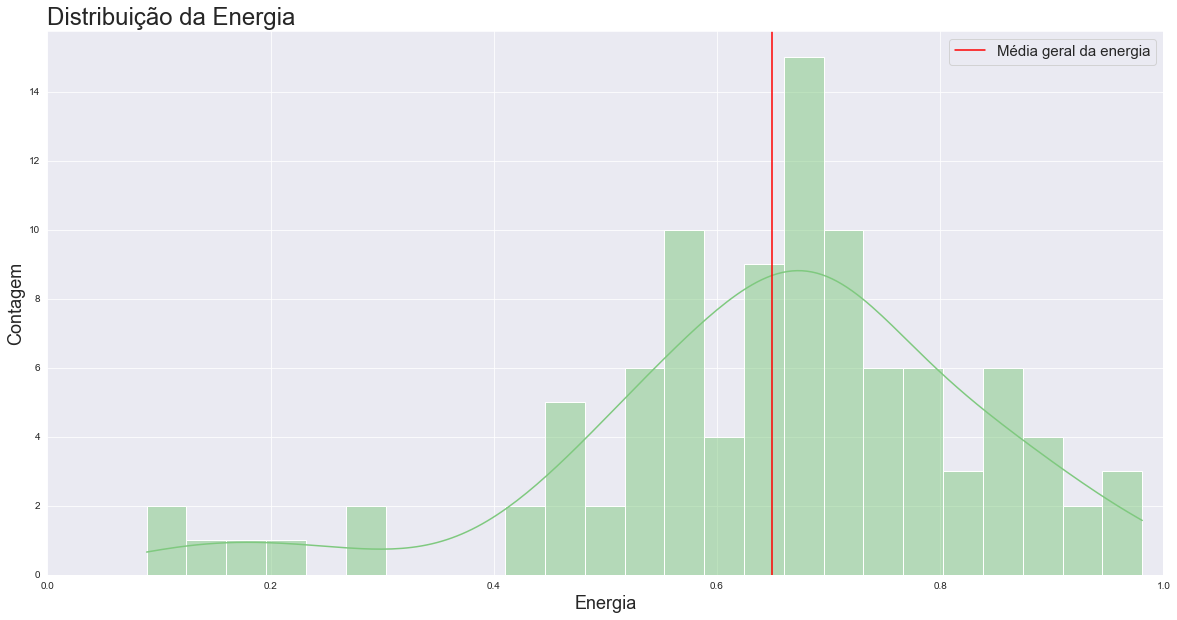

In [9]:
plotar_histograma_unico(df_pop, "energy", "Distribuição da Energia",
          "Energia", "Contagem", 0, 1, "Média geral da energia")

#### Comparaçao da energia entre os gêneros menos e mais populares

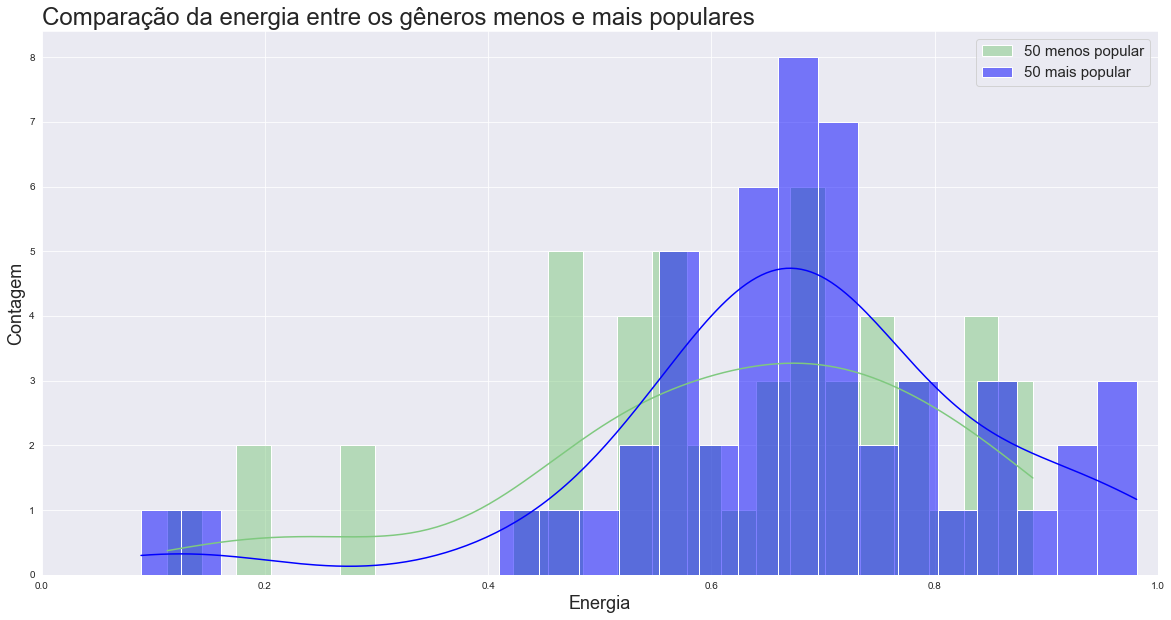

In [10]:
plotar_histograma_comparacao("energy", "Comparação da energia entre os gêneros menos e mais populares",
                            "Energia", "Contagem", 0, 1)

### Análise da dançabilidade

#### Distribuição geral da dançabilidade

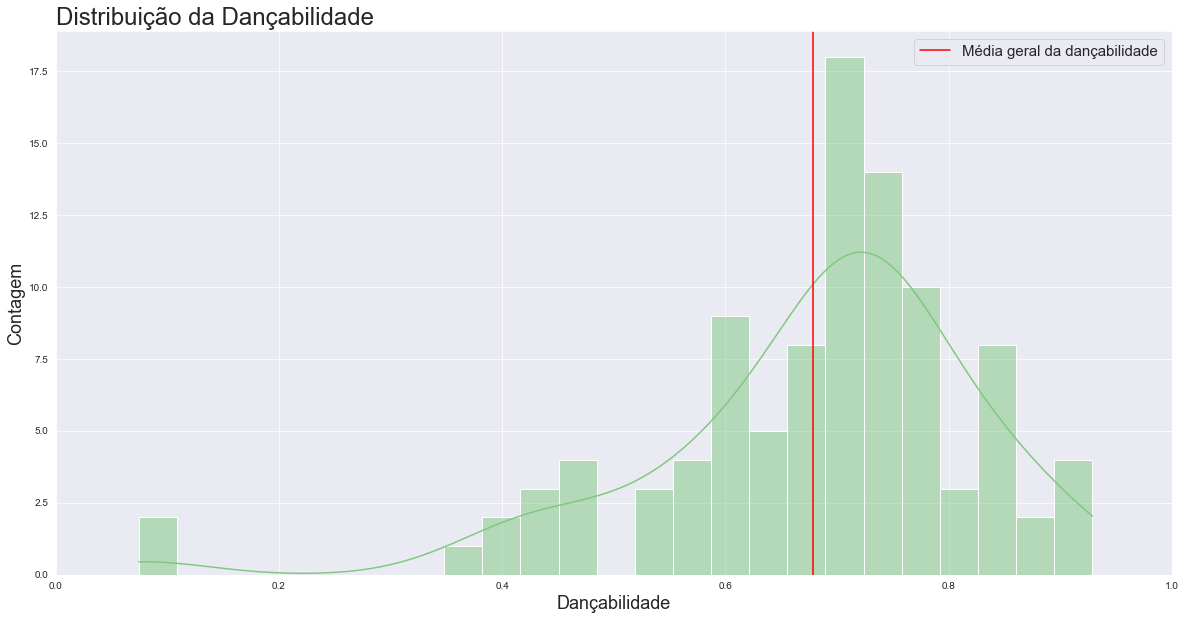

In [11]:
plotar_histograma_unico(df_pop, "danceability", "Distribuição da Dançabilidade",
          "Dançabilidade", "Contagem", 0, 1, "Média geral da dançabilidade")

#### Comparação da dançabilidade entre os gêneros mais e menos populares

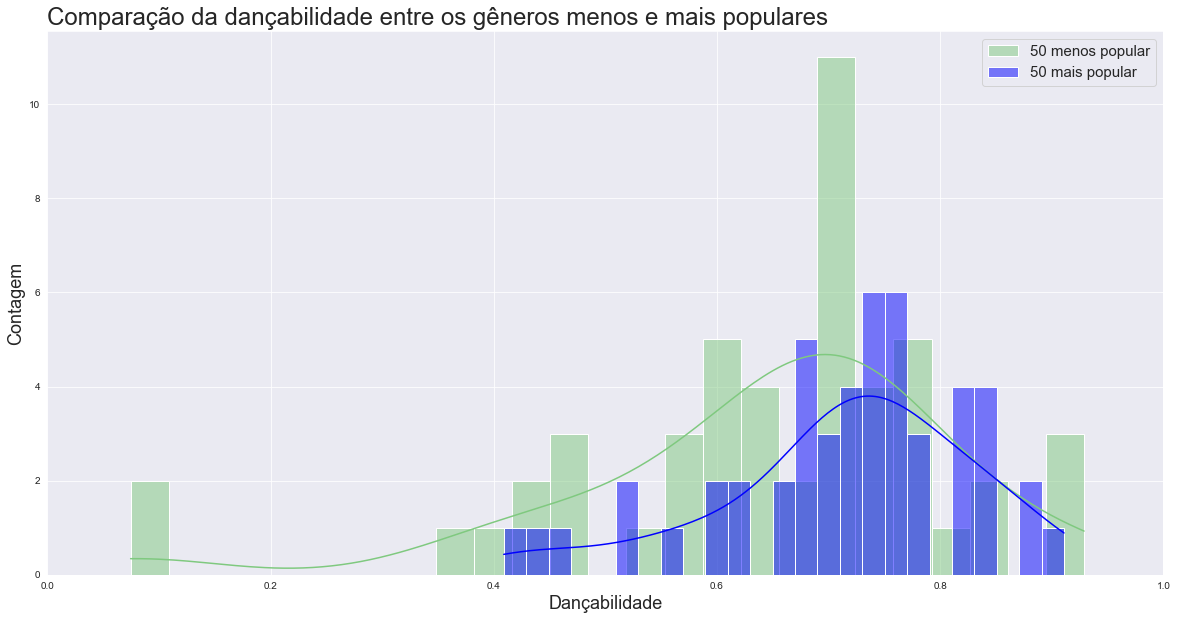

In [12]:
plotar_histograma_comparacao("danceability", "Comparação da dançabilidade entre os gêneros menos e mais populares",
                            "Dançabilidade", "Contagem", 0, 1)